## **Ejercicio N° 5**
El set de datos `viajes_tup.xlsx` contiene información sobre el número de viajes mensuales registrados en el Transporte Urbano de Pasajeros (TUP) de la ciudad de Rosario entre los años 2015 y 2021.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/viajes_tup.xlsx')#, encoding='latin-1')
df.head()

,periodo,validaciones_totales
0,2015-01-01,8325035
1,2015-02-01,8472410
2,2015-03-01,10486899
3,2015-04-01,11865691
4,2015-05-01,11568866


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   periodo               84 non-null     datetime64[ns]
 1   validaciones_totales  84 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


In [ ]:
df.describe()

,periodo,validaciones_totales
count,84,8.400000e+01
mean,2018-06-16 14:17:08.571428608,8.919506e+06
min,2015-01-01 00:00:00,2.148120e+05
25%,2016-09-23 12:00:00,7.351491e+06
50%,2018-06-16 00:00:00,1.025936e+07
75%,2020-03-08 18:00:00,1.164562e+07
max,2021-12-01 00:00:00,1.290938e+07
std,NaN,3.405230e+06




1. Realice una tabla que resuma el total de viajes realizados por año y represente gráficamente dicha información. ¿Cuál fue el año en el que se registró la mayor cantidad de viajes en el TUP?

In [ ]:
df.groupby(df['periodo'].dt.year)['validaciones_totales'].sum()

,validaciones_totales
periodo,
2015,130867042
2016,134931801
2017,135495961
2018,127581349
2019,117025617
2020,38096306
2021,65240461


In [1]:
viajes_por_anio = df.groupby(df['periodo'].dt.year)['validaciones_totales'].sum()
año_max = viajes_por_anio.idxmax()
print(f'El año con mayor cantidad de viajes registrados es el {año_max}')



plt.figure(figsize=(10, 6))
sns.barplot(data=viajes_por_anio, palette=['crimson' if year == año_max else 'steelblue' for year in viajes_por_anio.index], legend=False)
plt.title('Validaciones de Transporte Público por Año', fontsize=16, weight='bold', pad=20)
plt.xlabel('Año', fontsize=12, fontweight='bold')
plt.ylabel('Validaciones Totales (Millones)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.7, linestyle='--', axis='y')
plt.show()

NameError: name 'df' is not defined



2. Construya un gráfico en el que se represente la evolución del número de viajes registrados en el TUP a lo largo de los meses para los años 2019 y 2020. Comente brevemente lo observado.

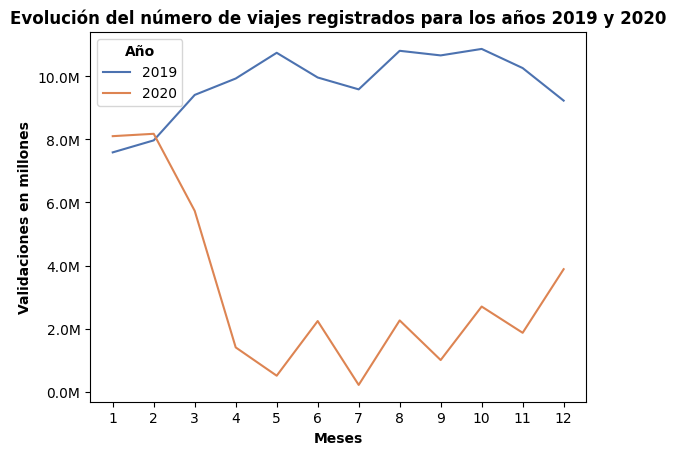

In [ ]:
df['año'] = df['periodo'].dt.year
df['mes'] = df['periodo'].dt.month

# Filtrar y graficar
df_filtrado = df[df['año'].isin([2019, 2020])]

sns.lineplot(data=df_filtrado, x='mes', y='validaciones_totales', hue='año', palette='deep')
plt.title("Evolución del número de viajes registrados para los años 2019 y 2020", weight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.gca().get_legend().set_title('Año', prop={'weight' : 'bold'})
plt.ylabel("Validaciones en millones", weight='bold')
plt.xlabel("Meses", weight='bold')
plt.xticks(range(1,13,1))
plt.show()